In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

## 1. 무임승차 이용객, 무임비용 분석

In [2]:
# 2016~2021 무임승차 인구수(단위: 천명)
df_group_pop = pd.read_csv('../data/수정 후 데이터/무임승차 인구(2016~2021).csv')
df_group_pop.head()

,년도,대상,서울교통공사,서울메트로,서울특별시 도시철도공사,서울메트로 9호선(주),서울교통공사9호선운영부문,부산교통공사,대구도시철도공사,인천교통공사,광주광역시 도시철도공사,대전교통공사,부산-김해 경전철(주),의정부 경량전철(주),용인 경량전철(주),우이 신설경전철(주),김포골드라인(주),합계
0,2016,노인,0,121979,81162,9337,987,72059,33297,9498,4830,6823,0,3244,1796,0,0,345012
1,2016,장애인,0,27736,20278,2534,226,14535,7034,3137,1031,1736,974,988,524,0,0,80733
2,2016,국가유공자,0,2023,1473,166,18,963,394,141,72,114,77,41,18,0,0,5500
3,2016,기타,0,0,0,0,2,0,0,0,0,287,0,0,7,0,0,296
4,2017,노인,208466,0,0,9746,1103,77631,36211,14109,5092,7081,0,3556,2001,1195,0,366191


In [3]:
# 년도별 무임승차 이용객 수
df_group_pop_year = df_group_pop.groupby(['년도'])[['합계']].sum()
df_group_pop_year.reset_index(inplace=True)

In [4]:
df_group_pop_year.head()

,년도,합계
0,2016,431541
1,2017,452784
2,2018,465831
3,2019,497095
4,2020,358371


In [5]:
df_group_pop_year['년도'] = df_group_pop_year['년도'].astype('str')

In [6]:
# 전국 대상별 무임승차 인원 합계
df_group_pop_target = df_group_pop.groupby(['대상'])[['합계']].sum()
df_group_pop_target.reset_index(inplace=True)

In [7]:
df_group_pop_target.head()

,대상,합계
0,국가유공자,29584
1,기타,2090
2,노인,2109300
3,장애인,444845


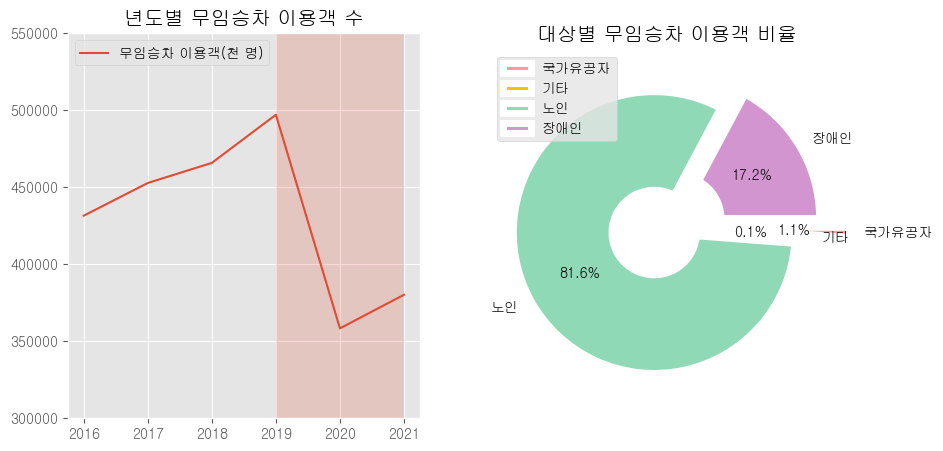

In [8]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(df_group_pop_year['년도'], df_group_pop_year['합계'], label='무임승차 이용객(천 명)')
ax1.set_ylim(300000, 550000)
ax1.legend(loc='upper left')
ax1.axvspan(3, 5,  facecolor='#e24a33', alpha=0.2) # 코로나 기간
ax1.set_title('년도별 무임승차 이용객 수')

ax2 = fig.add_subplot(1,2,2)
ax2.pie(df_group_pop_target['합계'], labels=df_group_pop_target['대상'], autopct='%.1f%%', 
        startangle=0, counterclock=False, explode=[0.3, 0, 0.1, 0.1], 
        colors=['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], 
        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
ax2.legend(loc='upper left')
ax2.set_title('대상별 무임승차 이용객 비율')

plt.show()

#### 해석
- 무임승차를 하는 이용객은 대다수가 노령자와 장애인으로 이루어짐을 알 수 있다.
- 무임승차 이용객은 시간이 지날수록 증가하는 추세를 보여왔다. 
- 하지만 붉은색으로 표시한 부분을 보면 알 수 있듯이 코로나의 발생 직후 급감하는 모습을 보인다. 이는 코로나의 여파로 전체적인 이용수 감소에 따른 일시적인 현상으로 유추된다. 왜냐하면 with코로나 이후 지하철 이용객이 증가함에 따라 소폭 증가하는 양상을 볼 수 있었기 때문이다.
- 보다 정확한 분석을 위해서는 지하철 이용객 수의 유임승차와 무임승차에 대한 비율 변화를 확인할 필요가 있다.

In [9]:
df_group_fare = pd.read_csv('../data/수정 후 데이터/무임비용(2016~2021).csv')
df_group_fare.head()

,년도,대상,서울교통공사,서울메트로,서울특별시 도시철도공사,서울메트로 9호선(주),서울교통공사9호선운영부문,부산교통공사,대구도시철도공사,인천교통공사,광주광역시 도시철도공사,대전교통공사,부산-김해 경전철(주),의정부 경량전철(주),용인 경량전철(주),우이 신설경전철(주),김포골드라인(주),합계
0,2016,노인,0,165984,109756,11671,1234,91450,36654,11873,6206,8880,0,4380,2604,0,0,450692
1,2016,장애인,0,37741,27436,3167,283,18446,7743,3921,1323,2307,1306,1333,760,0,0,105766
2,2016,국가유공자,0,2753,1992,207,23,1222,434,176,93,148,104,55,26,0,0,7233
3,2016,기타,0,0,0,0,4,0,0,0,0,360,0,0,10,0,0,374
4,2017,노인,283059,0,0,12182,1379,103710,45264,19047,6936,9176,0,4801,2901,1494,0,489949


In [10]:
# 년도별 무임비용 합계
df_group_fare = df_group_fare.groupby('년도')[['합계']].sum()
df_group_fare.reset_index(inplace=True)

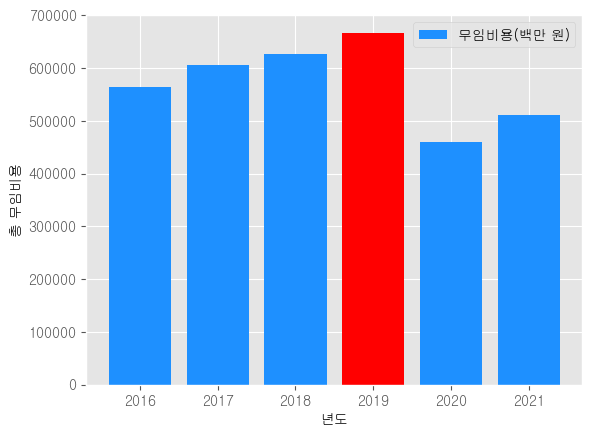

In [11]:
colors = ['dodgerblue', 'dodgerblue', 'dodgerblue', 'red', 'dodgerblue', 'dodgerblue']
plt.bar(df_group_fare['년도'], df_group_fare['합계'], label='무임비용(백만 원)', color=colors)
plt.xlabel('년도')
plt.ylabel('총 무임비용')
plt.legend(loc='upper right')
plt.show()

## 2. 연도별 유무임 이용객 비율 분석

In [12]:
df_fares = pd.read_csv('../data/수정 후 데이터/유무임승하차인원1~9.csv')
df_fares.head()

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원
0,202112,1호선,서울역,1023496,158933,992919,149469
1,202112,1호선,제기동,217819,226280,208609,241771
2,202112,1호선,종각,755897,116282,740655,108719
3,202112,1호선,종로3가,407934,249355,375067,234742
4,202112,1호선,종로5가,359249,220044,362984,210306


In [13]:
df_fares['사용월'] = df_fares['사용월'].astype('str')

In [14]:
# 연도 컬럼 생성
df_fares['연도'] = df_fares['사용월'].apply(lambda x: x[:4])

In [15]:
# 유임 이용객 컬럼 생성
df_fares['유임 이용객'] = df_fares[['유임승차인원', '유임하차인원']].sum(axis=1)

In [16]:
# 무임 이용객 컬럼 생성
df_fares['무임 이용객'] = df_fares[['무임승차인원', '무임하차인원']].sum(axis=1)

In [17]:
# 연도별 유무임승차 총합 생성
df_fares_year = df_fares[df_fares.columns[7:]].groupby('연도').sum()

In [18]:
df_fares_year.reset_index(inplace=True)

In [19]:
df_fares_year.head()

,연도,유임 이용객,무임 이용객
0,2017,4465671051,815437642
1,2018,4483304611,831543525
2,2019,4541486243,878111557
3,2020,3302769059,627558537
4,2021,3341692908,666941310


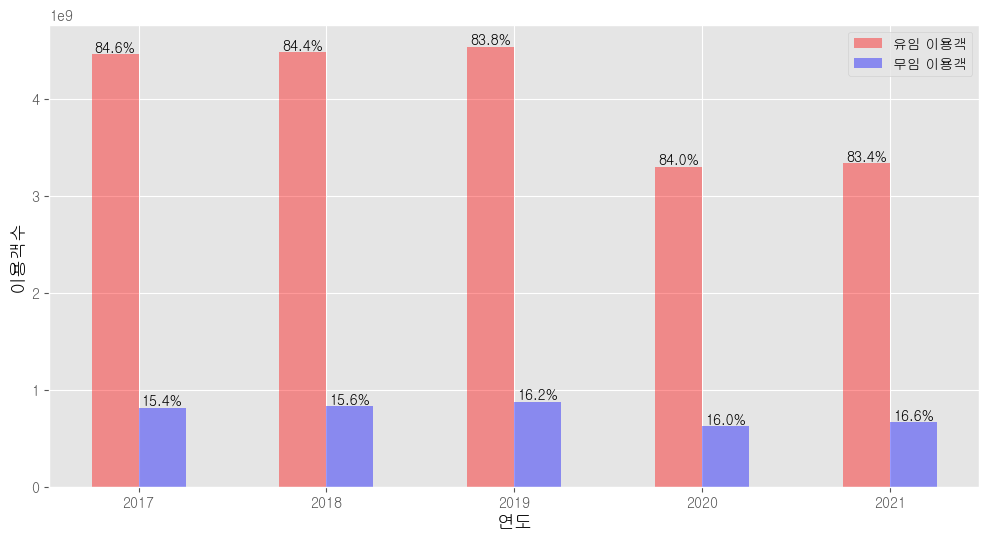

In [20]:
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 연도가 5개이므로 0, 1, 2, 3, 4 위치를 기준
index = np.arange(5)

# 각 연도별로 2개 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df_fares_year['유임 이용객'], bar_width, alpha=0.4, color='red', label='유임 이용객')
b2 = plt.bar(index+bar_width, df_fares_year['무임 이용객'], bar_width, alpha=0.4, color='blue', label='무임 이용객')

# 연도를 중간에 표시하기 위해 x축 위치 조정
tick_positions = index + bar_width / 2
plt.xticks(tick_positions, df_fares_year['연도'])

# x축, y축 이름 및 범례 설정
plt.xlabel('연도', size=13)
plt.ylabel('이용객수', size=13)
plt.legend()

# 각 막대 위에 유무임 승객 비율 표시
for i in range(len(index)):
    total_passengers = df_fares_year.loc[i, '유임 이용객'] + df_fares_year.loc[i, '무임 이용객']
    percentage_paid = df_fares_year.loc[i, '유임 이용객'] / total_passengers * 100
    percentage_free = df_fares_year.loc[i, '무임 이용객'] / total_passengers * 100
    
    plt.text(index[i], df_fares_year.loc[i, '유임 이용객'], f'{percentage_paid:.1f}%', ha='center', va='bottom')
    plt.text(index[i]+bar_width, df_fares_year.loc[i, '무임 이용객'], f'{percentage_free:.1f}%', ha='center', va='bottom')

plt.show()